# Project goal
In this project, I want to get an answer to the question; "how well can you predict whether a passenger survived the titanic disaster?" 

## Dataset
I found a dataset on [kaggle](https://www.kaggle.com/c/titanic) with info of all passengers. This data is already split into train and test data.

In [1]:
#import library's 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Load datasets

In [2]:
titanic = pd.read_csv('data/titanic.csv')

## EDA
We will look at what columns there are, whether we are dealing with missing data. Also we are going to look which columns have the highest correlation with survival before going to the moddeling phase.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary
Copied from source:

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable Notes
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [4]:
titanic.shape

(891, 12)

## Correlation Graphs
We eventually want to predict the survival likelihood. We begin by looking at the distribution of survival rates.

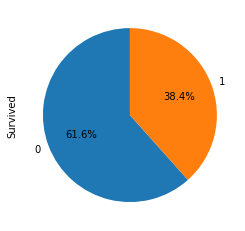

In [5]:
fig, ax = plt.subplots()
titanic['Survived'].value_counts().plot(ax=ax, kind='pie', autopct='%1.1f%%', startangle=90)
plt.show()

Here we see that 60% did not survive the disaster. That's more than half. But fortunately, it's not much more. Then we could have a problem that the model always predicts that a passenger will not survive, and therefore obtains a high accuracy.  

To get a better understanding of how a column affects the survival rate, we are going to look at each column in a graph. 

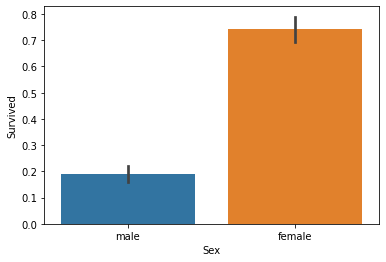

In [6]:
sns.barplot(x='Sex',y='Survived',data=titanic)  
plt.show()

The difference between men and women is very large. Everyone knows the cry; **"women and children first!"**. Lifeboats were filled with women first and only then men had their turn. As a result, more men died than women.

But, how is the distribution of age?

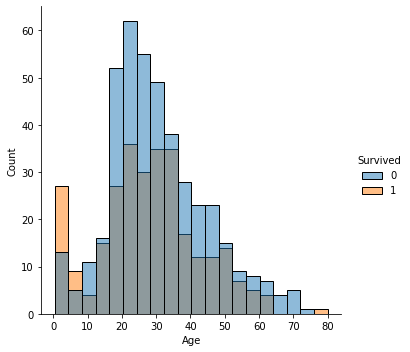

In [7]:
sns.displot(titanic,x='Age',hue='Survived')
plt.show()

You can see here that most of the passengers have an age between 20 and 40. And we see a lot more young children than old children. So we can assume that there were more parents with young children on board than parents with older children. You can also see that most children under 10 did survive the disaster while most over 10 did not. Here again you can see that the phrase **"Women and children first!"** has actually been applied. 

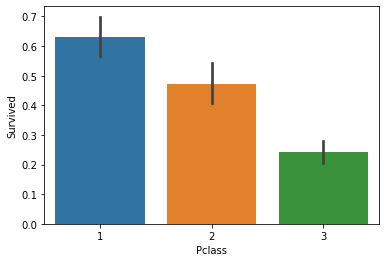

In [8]:
sns.barplot(x='Pclass',y='Survived',data=titanic)
plt.show()

What kind of passenger class you were, also has a very big impact on your chance of survival. The lower your class the smaller the chance of survival. So most lifeboats were filled with the rich first. 

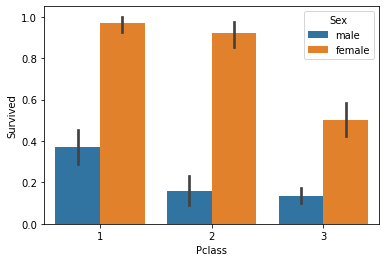

In [9]:
sns.barplot(x='Pclass',y='Survived',data=titanic,hue='Sex')
plt.show()

Here you do see that gender is more important than passenger class. Because as a 3rd class woman you had a better chance of survival than a 1st class man.  

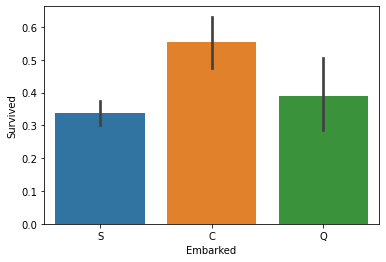

In [10]:
sns.barplot(x='Embarked',y='Survived',data=titanic)
plt.show()

It seems that your boarding point does have some impact on your chances of survival. But that's probably because people of a certain class are more likely to have the same boarding place. To confirm this hypothetical theory, we are going to compare the boarding point to the passenger class. 

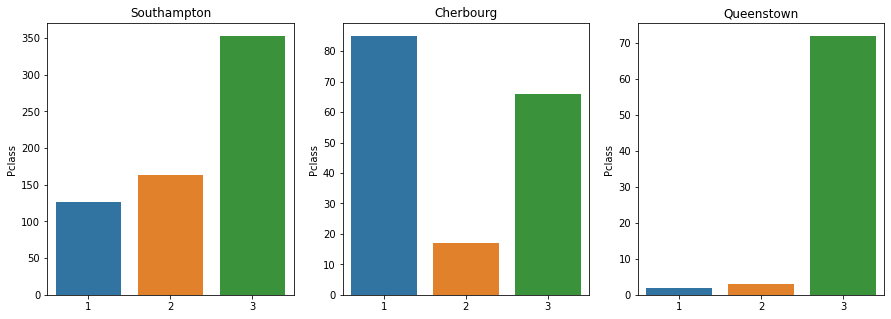

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(ax= axes[0], 
            x=titanic[titanic['Embarked']== 'S']['Pclass'].value_counts().keys(),
            y=titanic[titanic['Embarked']== 'S']['Pclass'].value_counts())
axes[0].set_title('Southampton')

sns.barplot(ax= axes[1], 
            x=titanic[titanic['Embarked']== 'C']['Pclass'].value_counts().keys(),
            y=titanic[titanic['Embarked']== 'C']['Pclass'].value_counts())
axes[1].set_title('Cherbourg')

sns.barplot(ax= axes[2], 
            x=titanic[titanic['Embarked']== 'Q']['Pclass'].value_counts().keys(),
            y=titanic[titanic['Embarked']== 'Q']['Pclass'].value_counts())
axes[2].set_title('Queenstown')

plt.show()

Indeed, we see here that At Cherbourg there were many first class passengers boarded. This explains the difference in survival rate relative to your boarding point.  

So boarding point does have some relation to your chances of survival. However, it does not seem to be a major factor. It tells more about what kind of passenger class you probably were, than about your survival rate.

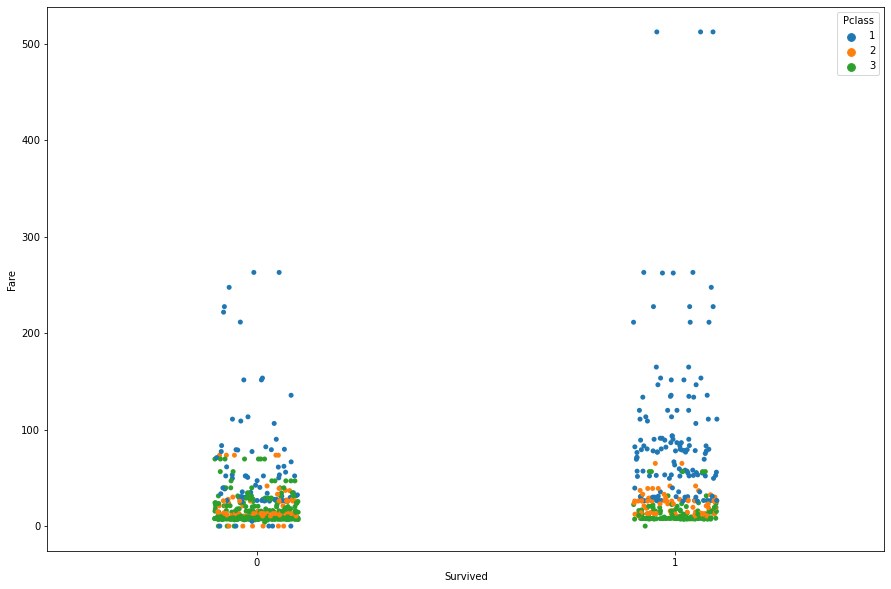

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(y = titanic['Fare'], x = titanic['Survived'], hue=titanic['Pclass'])
plt.show()

Here you can see that Fare has a clear relationship with your passenger class. It has less to do with your survival rate. For example, there are very many people who paid around 0 who still survived the disaster. 

## Missing data

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that 3 columns have missing data. `Embarked` has only 2 missing values. Therefore it is difficult to say which type (MCAR, MAR or NMAR) of missing data it is. Since it will not affect our model very much we are going to fill the 2 rows with the columns most common value.

In [14]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)
titanic['Embarked'].isnull().sum()

0

Of the remaining two, `Cabin` and `Age`, we might be able to figure out what kind of missing data that is. To find out, we are going to replace the data in the columns with missing (1) or not missing (0) values. That way we can later compare wether the missing status has corrilations with other columns. And we can try and figure out why the data is missing

In [15]:
isnulldf = titanic[['Age','Cabin']].isnull()
isnulldf = isnulldf.rename(columns = {'Age': 'AgeNull', 'Cabin': 'CabinNull'})
isnulldf = isnulldf.replace(False,0)

combineddf = pd.concat([isnulldf, titanic], axis=1)
combineddf = combineddf.drop(columns=['Age', 'Cabin'])
combineddf.head()

,AgeNull,CabinNull,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,0.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,0.0,1.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


We are going to look to see if there is a correlation between the missing data and certain other columns. 

### Survived

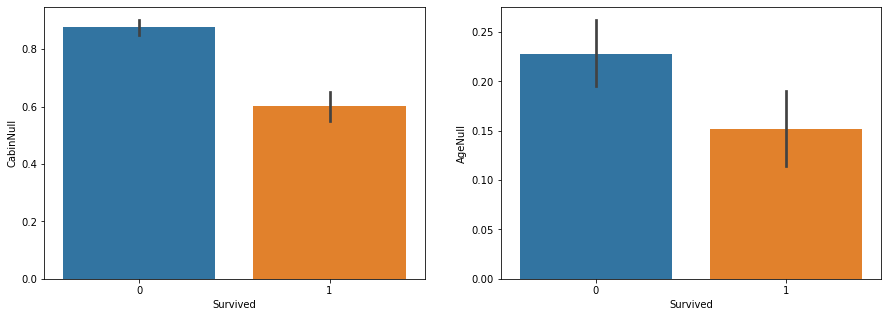

In [16]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(ax=axes[0], x='Survived',y='CabinNull',data=combineddf)
sns.barplot(ax=axes[1], x='Survived',y='AgeNull',data=combineddf)
plt.show()

You see that in both cases there is more missing data when someone did not survive the disaster. This makes sense because a dead person cannot answer questions anymore. By this I mean that when data is unknown about a dead person, it is harder to find the answer. With a living person you can just ask the person in question about his/her age or cabin.
### Player class

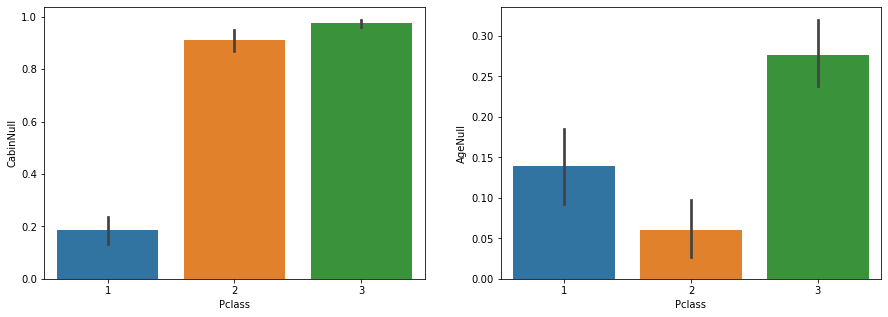

In [17]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(ax=axes[0], x='Pclass',y='CabinNull',data=combineddf)
sns.barplot(ax=axes[1], x='Pclass',y='AgeNull',data=combineddf)
plt.show()

With cabin you can clearly see that the lower the class the more often your cabin is unknown. So there was probably less of an effort to register the cabin for people of a lower class. It may also be because 3rd class passengers were less likely to survive the disaster, that is why more often the data is not known.

In age we do not see the same trend. Here, on the other hand, we see that there is more missing data with the 1st class than with the 2nd class. So no real clear correlation yet.

It does certainly stand out that in both cases there is more missing data among the 3rd class passengers. 
### Embarked

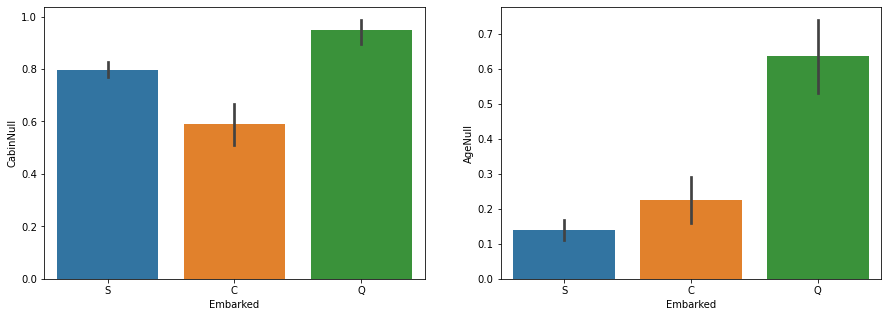

In [18]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(ax=axes[0], x='Embarked',y='CabinNull',data=combineddf)
sns.barplot(ax=axes[1], x='Embarked',y='AgeNull',data=combineddf)
plt.show()

In both cases, we see the most missing data among passengers who boarded in Queenstown. For age, the difference is much larger than for cabin. For cabin, the difference even seems negligible.  

We also know that most of the people who boarded in Queenstown were 3rd class passengers. From the chart above, we know that 3rd class passengers have more missing data anyway. 
### Sex

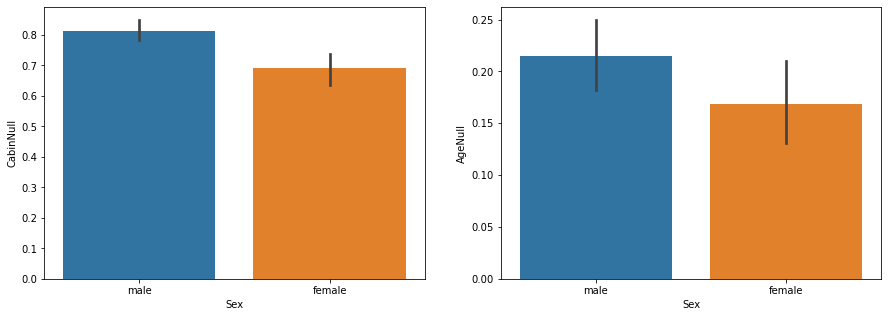

In [19]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(ax=axes[0], x='Sex',y='CabinNull',data=combineddf)
sns.barplot(ax=axes[1], x='Sex',y='AgeNull',data=combineddf)
plt.show()

In [20]:
print(len(np.where(combineddf['CabinNull'] == combineddf['AgeNull'])[0]))
print(len(combineddf))

343
891


It is more common for men to have missing data than for women. But we also know that more men did not survive the disaster. Because of this, it may make sense that fewer data is known for men.
### Missing data Conclusion

In [21]:
titanic["Cabin"].describe(include='all')

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

When data misses doesn't seem random. Thus, it is not MCAR or MAR. MNAR, therefore, seems to be the case. Because the data is **not missing at random**. 
## Data preparation
We are going to replace the `Cabin` column with either missing data (1) or not missing data (0). This is because the true value of this column is unique per passenger.  But whether the data is missing or not is in corrilaiton with the survival chance. 

In [22]:
titanic["Cabin"] = titanic["Cabin"].notnull().astype('int')

We are going to replace the missing `Age` values with the average of the column.  Since Age is an important value for estimating the survival rate, we have to make sure that the missing values are filled in with something. For age I have therefore chosen to fill in the average.

In [23]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [24]:
titanic["PassengerId"] = titanic["PassengerId"].astype(str)
titanic[["Name", "PassengerId", "Ticket"]].describe(include="all").loc[["count", "unique","top","freq"]]

,Name,PassengerId,Ticket
count,891,891,891
unique,891,891,681
top,"Badt, Mr. Mohamed",662,1601
freq,1,1,7


We see here that `Ticket` , `Name` and `PassengerId` are almost unique for each passenger. Therefore, this is not a good training data. Therefore, we drop them.

In [25]:
titanic = titanic.drop(["Name", "PassengerId", "Ticket"], axis=1)

We also know that `Fare` does not say very much about the survival rate. Therefore, we also drop this column.

In [26]:
titanic = titanic.drop(["Fare"], axis=1)

## EDA conclusion
- Females survive more often ("whoman and children first") 
- Young and very old peaple survived more ofther ("whoman and children first") 
- High class passagers survive more often. Probably because the crew considered them more important. 
- Passengers traveling from the port of Cherbourg have a higher chance of survival than passengers from other ports. This may be because the place of embarkation says something about the class of passengers.   
  

- Age had a lot of missing values so we replaced them with the mean
- Cabin had a lot of missing values but we found out that whether the value is missing or not. does say something about the survival rate. So we replaced it with missing or not missing values.  


- Ticket, passegner id and Name is passegner unique so we dropped it.
- Fare does not say very much about the survival rate. Therefore, we also drop this column.

# Machine learning

We have to divide the data into x and y columns 


In [27]:
X=titanic.drop(["Survived"],axis=True)
y=titanic["Survived"]

In [28]:
print(X.shape)
print(y.shape)

(891, 7)
(891,)


To make training more sufficient/faster we normalise age, and replace strings with int values. 

In [29]:
X["Age"]=np.log(X["Age"])

In [30]:
X['Sex'] = X['Sex'].replace(['male','female'],[1,2])
X['Embarked'] = X['Embarked'].replace(['S','C','Q'],[1,2,3])

Now split te data into train en test sets. And drop the index so we can excess data by index later

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(X, 
                                                     y,
                                                     test_size=0.33,
                                                     random_state=42)

x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Let's try some different machine learning algorithems. And do a grid search.

In [32]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)

print(dtc.score(x_test,y_test))

0.735593220338983
Wall time: 83 ms


In [33]:
%%time
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42,max_iter=140)
lr.fit(x_train,y_train)

print(lr.score(x_test,y_test))

0.8305084745762712
Wall time: 17 ms


In [34]:
#import svm
from sklearn import svm

In [35]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svc = svm.SVC()
clf_gs = GridSearchCV(svc, parameters)
clf_gs.fit(x_train, y_train)

Wall time: 10.6 s


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [36]:
clf_gs.score(x_test, y_test)

0.8169491525423729

In [37]:
clf_gs.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

We can see that the logistic regression has the highest (83%) accuracy score. Let's create a classification report and confusion matrix to get a better overview of how the model actually scores. 

In [38]:
#import metrics components
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

Classification report for classifier logistic regression:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       175
           1       0.82      0.75      0.78       120

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295




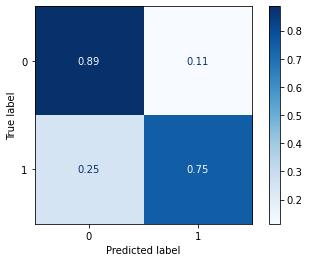

In [39]:
pred = lr.predict(x_test)

print(f"Classification report for classifier logistic regression:\n"
f"{classification_report(y_test, pred)}\n")

plot_confusion_matrix(lr, x_test, y_test,
                        cmap=plt.cm.Blues,
                        normalize='true')
plt.show()

We can see that it is better at predicting deaths than at predicting survivors. But what else does it have trouble with? To answer this we are going to take out the misclassified.
### Misclassified

In [40]:
miscl_ind = np.where(y_test != pred)
print(miscl_ind)

(array([  0,  16,  21,  27,  29,  33,  34,  36,  44,  65,  70,  76,  78,
        90,  96,  97, 108, 113, 125, 127, 128, 131, 134, 139, 141, 144,
       156, 159, 161, 172, 173, 176, 184, 188, 193, 201, 203, 204, 207,
       210, 221, 223, 243, 249, 254, 255, 263, 267, 289, 293], dtype=int64),)


In [41]:
miscl_dfs = []
for ind in miscl_ind[0]:
    df = x_test.loc[[ind]]
    df['Survived'] = y_test[ind]
    df['predicted'] = pred[ind]
    miscl_dfs.append(df)

miscl = pd.concat(miscl_dfs)

miscl['Sex'] = miscl['Sex'].replace([1,2],['male','female'])
miscl['Embarked'] = miscl['Embarked'].replace([1,2,3],['S','C','Q'])

miscl["Age"]=np.exp(miscl["Age"]).astype(int)
miscl

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Survived,predicted
0,3,male,29,1,1,0,C,1,0
16,1,male,42,1,0,1,S,1,0
21,1,male,34,0,0,0,S,1,0
27,2,male,31,0,0,0,S,1,0
29,3,female,31,0,0,0,S,0,1
33,3,female,29,0,0,0,S,0,1
34,3,male,17,0,0,0,S,1,0
36,1,male,27,0,0,1,S,1,0
44,3,female,44,0,1,0,C,0,1
65,2,female,57,0,0,1,S,0,1


Above we see a data frame with all misclassified individuals. Let's also look at which type of person is most often misclassified. 

In [42]:
print("Most frequent misclassified:")
display(miscl.mode())
print("Most frequent total:")
display(titanic.mode())

Most frequent misclassified:


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Survived,predicted
0,3,male,29,0,0,0,S,1,0


Most frequent total:


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,29.699118,0,0,0,S


So a 29 year old man from the 3rd class is misclassified most of the time. The model expects that the man would not have survived when, in fact, several times he did. But we also see that the most common passenger in total is also a 29 year old 3rd class male. Only he did not survive. It can therefore also be explained that the model misclassifies similar passengers. 

# Conslusion
To answer the research question; "how well can you predict whether a passenger survived the titanic disaster?" : pretty good! We examined which columns are most correlated with the survival rate. We also looked at what kind of missing data we have and whether the missing data is random or not. We chose which columns to use to train a model with. After trying several models, we achieved an 83% accuracy with Logistic regression. And I am very satisfied with this!

Luuk de Kinderen